In [1]:
import numpy as np
import datain
from matplotlib import pyplot as plt

In [2]:
t=np.linspace(0,59.99998,3000000)
Vp=.25*np.sin(0.5*np.pi*2*t)
V=.25*np.sin(0.5*np.pi*2*t+0.5*np.pi*2*.3)
J=.25*np.cos(0.5*np.pi*2*t)
Ns=np.shape(t)[0]
dt=t[1]

In [3]:
def getfft(data, tarr=np.array([])):
    datafft=np.zeros(np.shape(data))+1j*0
    Ns=np.shape(data)[0]
    
    if tarr.size>0:
        dt=tarr[1]
        freq=np.fft.fftshift(np.fft.fftfreq(Ns,dt))
        datafft=np.fft.fftshift(np.fft.fft(data)/(Ns/2))#Ns)
        del data, tarr
        return datafft, freq
    else:
        datafft=np.fft.fftshift(np.fft.fft(data)/(Ns/2))#Ns)
        del data, tarr
        return datafft

In [4]:
Vfft,freq=getfft(V,t)
Vpfft=getfft(Vp)
Jfft=getfft(J)

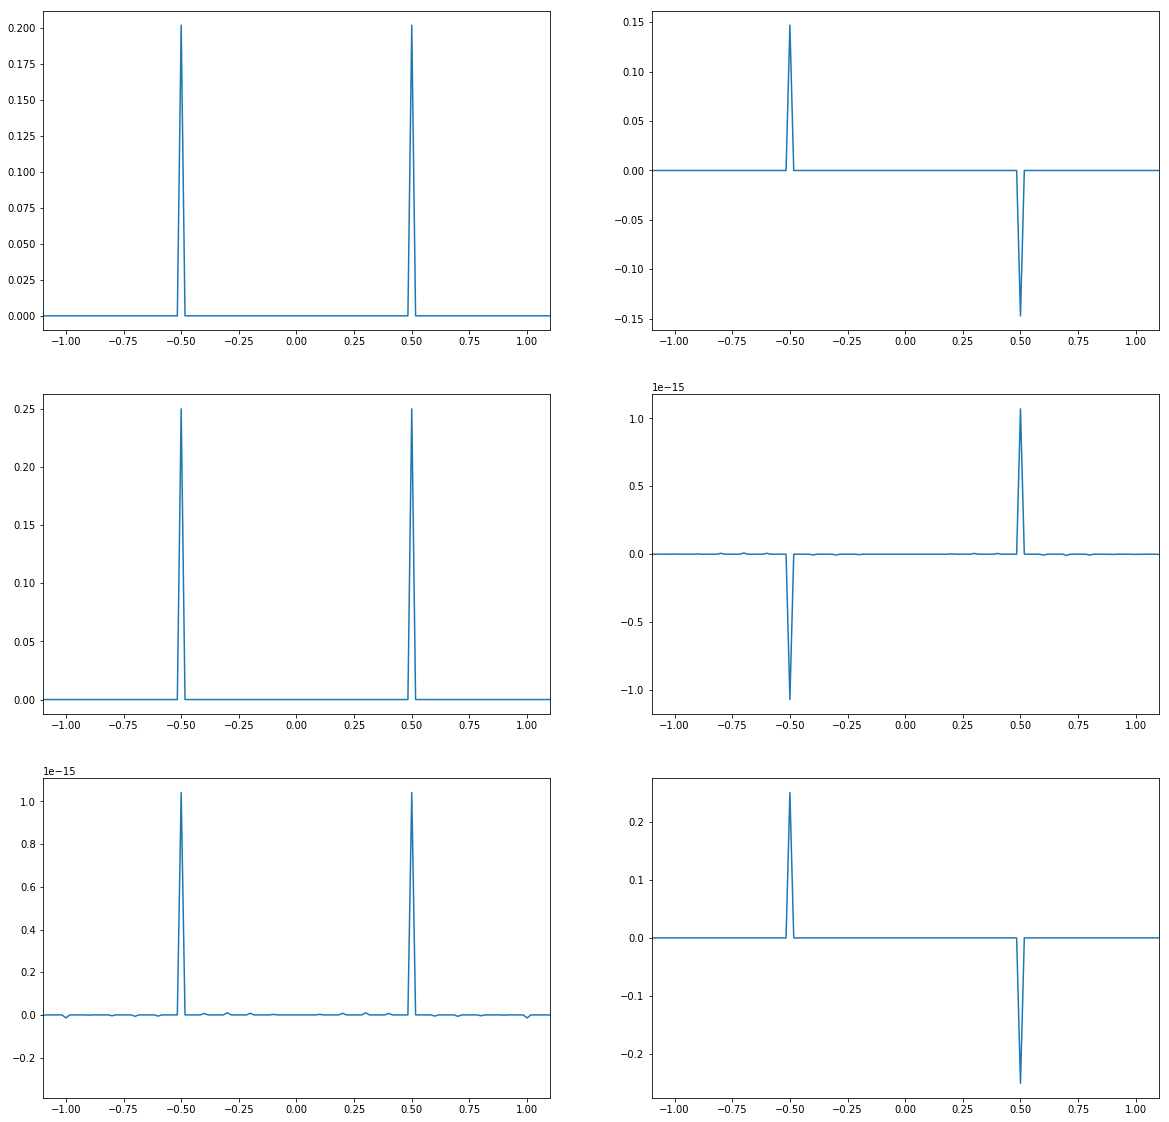

In [5]:
fig=plt.figure(figsize=(20,20))

ax1=fig.add_subplot(321)
ax1.plot(freq,np.real(Vfft))
ax1.set_xlim(-1.1,1.1)

ax1=fig.add_subplot(322)
ax1.plot(freq,np.imag(Vfft))
ax1.set_xlim(-1.1,1.1)

ax1=fig.add_subplot(323)
ax1.plot(freq,np.real(Jfft))
ax1.set_xlim(-1.1,1.1)

ax1=fig.add_subplot(324)
ax1.plot(freq,np.imag(Jfft))
ax1.set_xlim(-1.1,1.1)

ax1=fig.add_subplot(325)
ax1.plot(freq,np.real(Vpfft))
ax1.set_xlim(-1.1,1.1)

ax1=fig.add_subplot(326)
ax1.plot(freq,np.imag(Vpfft))
ax1.set_xlim(-1.1,1.1)

plt.show()

In [6]:
fftang=np.angle(Vfft)
fftmag=np.abs(Vfft)
bin1=datain.fftbin(0.5,freq,Ns,dt,"Real",1)
angadj=fftang[int(bin1[1])]+np.pi/2
angadj2=fftang[int(bin1[0])+1]-np.pi/2

fftang2=fftang

fftang2[int(Ns/2):]=fftang[int(Ns/2):]-angadj #adjusting positive frequencies
fftang2[:int(Ns/2)]=fftang[:int(Ns/2)]+angadj #adjusting negative frequencies

datafft2=datain.P2R(fftmag,fftang2)

In [7]:
print(np.angle(Vpfft[1499970]),np.pi/2*-1)

1.5707963267948926 -1.5707963267948966


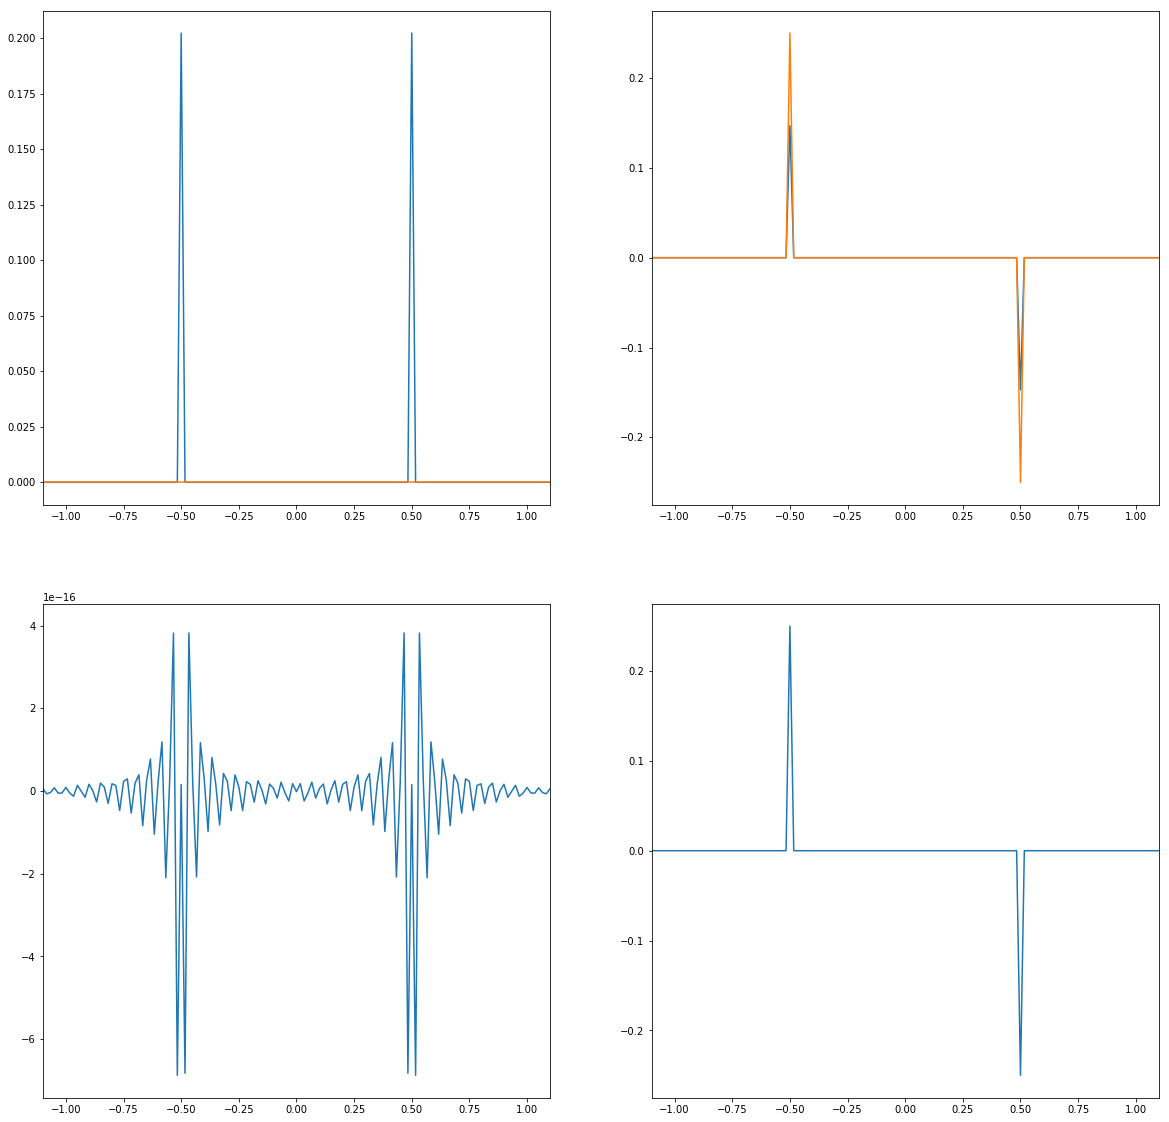

In [8]:
fig=plt.figure(figsize=(20,20))

ax1=fig.add_subplot(221)
ax1.plot(freq,np.real(Vfft),freq,np.real(Vpfft))
ax1.set_xlim(-1.1,1.1)

ax1=fig.add_subplot(222)
ax1.plot(freq,np.imag(Vfft),freq,np.imag(Vpfft))
ax1.set_xlim(-1.1,1.1)

ax1=fig.add_subplot(223)
ax1.plot(freq,np.real(datafft2))
ax1.set_xlim(-1.1,1.1)

ax1=fig.add_subplot(224)
ax1.plot(freq,np.imag(datafft2))
ax1.set_xlim(-1.1,1.1)

plt.show()

In [9]:
Vfftdum=np.fft.ifftshift(datafft2)
Vffti=np.fft.ifft(np.fft.ifftshift(datafft2)*Ns/2)

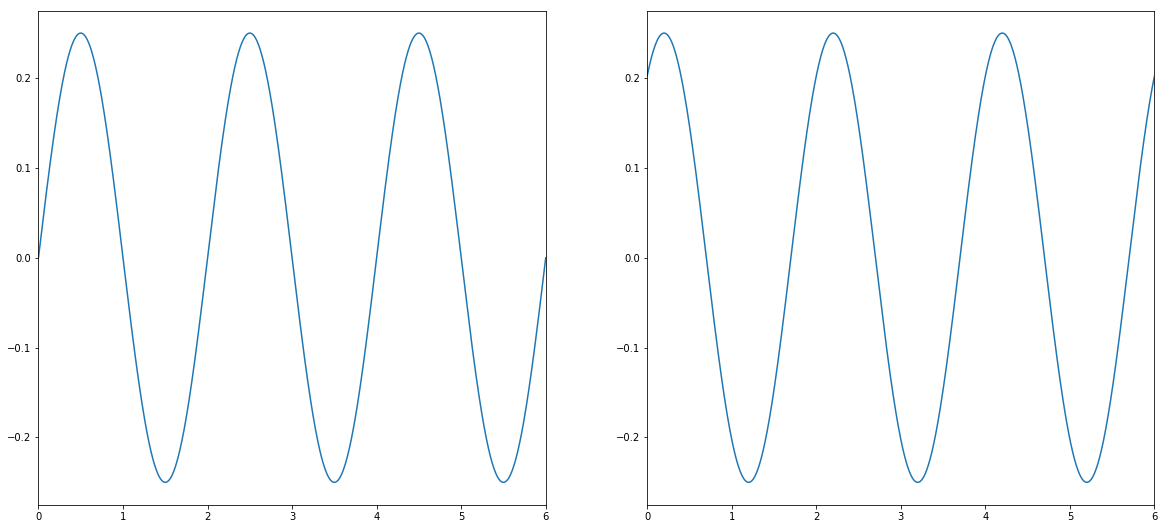

In [11]:
fig=plt.figure(figsize=(20,20))

ax1=fig.add_subplot(221)
ax1.plot(t,np.real(Vffti))
ax1.set_xlim(0,6)

ax1=fig.add_subplot(222)
ax1.plot(t,V)
ax1.set_xlim(0,6)

plt.show()